# [IAPR][iapr]: Lab 3 ‒  Classification


**Group ID:**17

**Author 1 (sciper):** Ben Haj Yahia AHMED (261217)  
**Author 2 (sciper):** Mahmoud Mohamed Nabegh Ahmed SAID (309264)   
**Author 3 (sciper):** Hongyu Gu (333804)   

**Release date:** 23.04.2021  
**Due date:** 07.05.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method (5 pts)
Using the Bayes method, give the expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data. Note that you do not need to solve the analytical expression. You can simply evaluate the function for each point on the plane to end up with a segmentation map.
For simplicity reasons, round the estimated parameters to the closest integer value.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


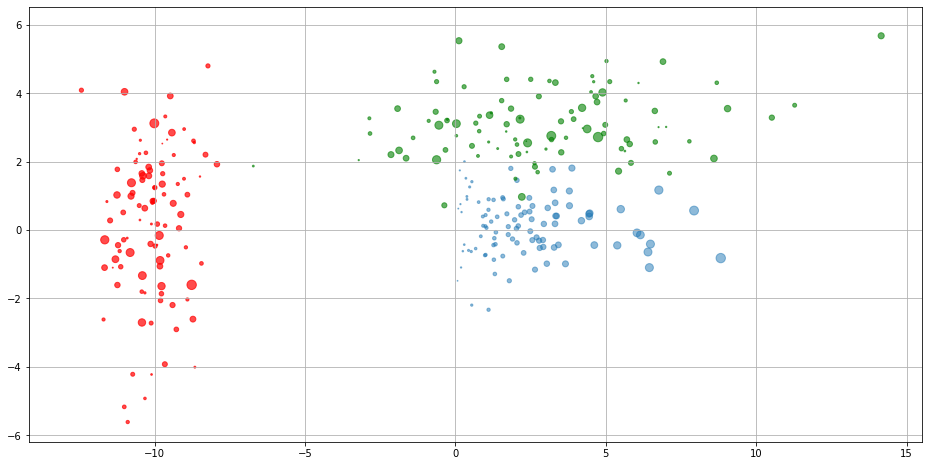

In [4]:

#data Visualization of the three classes in one plot

area = a[:,0]*10
fig = plt.figure(figsize=(16,8))
ax = plt.subplot()
ax.scatter(a[:,0], a[:,1], s=area, alpha=0.5)
ax.scatter(b[:,0], b[:,1], s=area, c='green', alpha=0.6)
ax.scatter(c[:,0], c[:,1], s=area, c='red', alpha=0.7)  

ax.grid(True)

plt.show()


/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/nabegh/Anaconda3/envs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

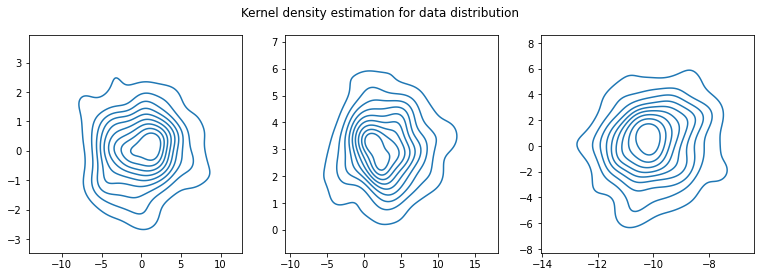

In [5]:
#show kernel density estimation for data distribution
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
sns.kdeplot(a[:,0], a[:,1],ax=axes[0])
sns.kdeplot(b[:,0], b[:,1], ax=axes[1])
sns.kdeplot(c[:,0], c[:,1], ax=axes[2])
plt.suptitle('Kernel density estimation for data distribution');

Distribution appear to be normally distributed

In [6]:
def round2int(arr):
    return np.round(arr).astype(int)

# Plot data points and estimate
a_mean = round2int(np.mean(a, axis=0))
a_cov = round2int(np.cov(a.T))
b_mean = round2int(np.mean(b, axis=0))
b_cov = round2int(np.cov(b.T))
c_mean = round2int(np.mean(c, axis=0))
c_cov = round2int(np.cov(c.T))

print('Means:')
print('a', a_mean)
print('b', b_mean)
print('c', c_mean)

print('\n\nCovariances')
print('a:\n', a_cov)
print('b:\n', b_cov)
print('c:\n', c_cov)

Means:
a [0 0]
b [3 3]
c [-10   0]


Covariances
a:
 [[10  0]
 [ 0  1]]
b:
 [[10  0]
 [ 0  1]]
c:
 [[1 0]
 [0 5]]


In [7]:
#create a Bayesclassifier

class BayesClassifier:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
        # Parameters of the bayes classifier
        a_mean = round2int(np.mean(a, axis=0))
        a_cov = round2int(np.cov(a.T))
        b_mean = round2int(np.mean(b, axis=0))
        b_cov = round2int(np.cov(b.T))
        self.c_mean = round2int(np.mean(c, axis=0))
        self.c_cov = round2int(np.cov(c.T))
        self.disc_a = self.get_discriminant_function(a_mean, a_cov, 1/3)
        self.disc_b = self.get_discriminant_function(b_mean, b_cov, 1/3)
        self.disc_c = self.get_discriminant_function(self.c_mean, self.c_cov, 1/3)
    
    def get_discriminant_function(self, mean, cov, pwi):
        precision = np.linalg.inv(cov)
        def discriminant_function(X):
            return -0.5 * np.diag(((X -  np.tile(mean, (X.shape[0], 1))) @ precision)\
                                  @ (X - np.tile(mean, (X.shape[0], 1))).T) + np.log(pwi)
        return discriminant_function    

    def predict(self, xtest):
        return np.argmax(np.vstack((self.disc_a(xtest), self.disc_b(xtest), self.disc_c(xtest))), axis=0) 

In [8]:
clf = BayesClassifier(a, b, c)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
y_true_a = np.array([0] * 200)
y_pred_a = clf.predict(a)
y_true_b = np.array([1] * 200)
y_pred_b = clf.predict(b)
y_true_c = np.array([2] * 200)
y_pred_c = clf.predict(c)

In [11]:
print(f"accuracy for class a {accuracy_score(y_true_a, y_pred_a)}")
print(f"accuracy for class b {accuracy_score(y_true_b, y_pred_b)}")
print(f"accuracy for class c {accuracy_score(y_true_c, y_pred_c)}")

accuracy for class a 0.945
accuracy for class b 0.95
accuracy for class c 1.0


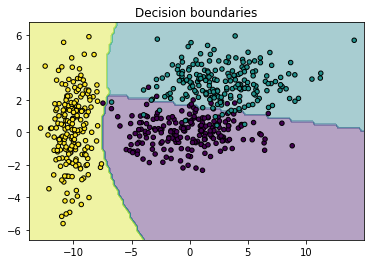

In [12]:
from itertools import product

X = np.vstack((a, b, c))
y = np.ravel(np.vstack((y_true_a, y_true_b, y_true_c)))

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))



Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('Decision boundaries')

plt.show()

### 1.2 Mahalanobis distance (5 pts)
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

In [13]:
class MahalanobisBinaryClassifier():
    def __init__(self, xtrain, ytrain):
        self.a = xtrain[ytrain == 0, :]
        self.b = xtrain[ytrain == 1, :]
        a_mean = round2int(np.mean(self.a, axis=0))
        a_cov = round2int(np.cov(self.a.T))
        b_mean = round2int(np.mean(self.b, axis=0))
        b_cov = round2int(np.cov(self.b.T))
        self.md_a = self.get_mahalanobis_distance(a_mean, a_cov)
        self.md_b = self.get_mahalanobis_distance(b_mean, b_cov)
        
    def get_mahalanobis_distance(self, mean, cov):
        precision = np.linalg.inv(cov)
        def mahalanobis_distance(X):
            return np.sqrt(np.diag(((X -  np.tile(mean, (X.shape[0], 1))) @ precision)\
                                  @ (X - np.tile(mean, (X.shape[0], 1))).T))
        return mahalanobis_distance    

    def predict(self, xtest):
        return np.argmin(np.vstack((self.md_a(xtest), self.md_b(xtest))), axis=0) 


X = np.vstack((a,b))
y = np.ravel(np.vstack((y_true_a,y_true_b)))

clf = MahalanobisBinaryClassifier(X, y)

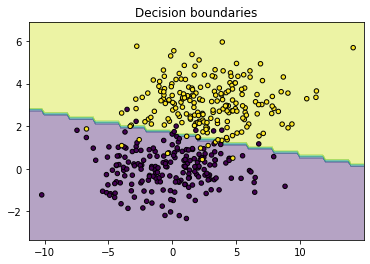

In [14]:
from itertools import product

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))



Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('Decision boundaries')

plt.show()

The results of the Mahalanobis distance classifier and the Bayesian classifier are different because the discriminant functions used by the two are different. The former uses the Mahalanobis distance from the vector x to the mean vector of each class, and x is attributed to it. The class to which the nearest mean belongs. The latter is used to calculate the posterior probability of x, and the class with the largest posterior probability is selected as the class to which the object belongs, but the prior probability must be known.

---

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python. 

**! Warning**: When the lab was created the official MNIST repo was down, if it is still the case please use https://github.com/mkolod/MNIST.

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [15]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [16]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

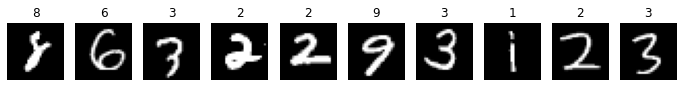

In [17]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

In [18]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


### 2.2 MLP (10 pts)

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

#data preprocessing
#reshape the data to 784-dimension
train_images = train_images.reshape(train_images.shape[0], -1) / 255
test_images = test_images.reshape(test_images.shape[0], -1) / 255

print(train_images.shape)

#create an MLP
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(train_images, train_labels)

print("Training set score: %f" % mlp.score(train_images, train_labels))
print("Test set score: %f" % mlp.score(test_images, test_labels))
print('number of layers：%s，output units：%s' % (mlp.n_layers_, mlp.n_outputs_))




(60000, 784)
Iteration 1, loss = 0.68302513
Iteration 2, loss = 0.40982835
Iteration 3, loss = 0.40449380
Iteration 4, loss = 0.40777886
Iteration 5, loss = 0.43119310
Iteration 6, loss = 0.42038088
Iteration 7, loss = 0.44337069
Iteration 8, loss = 0.45009634
Iteration 9, loss = 0.43069011
Iteration 10, loss = 0.46643159
Iteration 11, loss = 0.43733962
Iteration 12, loss = 0.44979613
Iteration 13, loss = 0.44608950
Iteration 14, loss = 0.43416093
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.892083
Test set score: 0.885500
number of layers：3，output units：10


In [20]:
#show the result
mlp.score(test_images,test_labels)

0.8855